# Airbnb Lisbon Data Analysis

This notebook will analyse public data from airbnb, obtained from http://insideairbnb.com/get-the-data.html. We will look at data from the capital city of Portugal which is Lisbon to try to answer the following questions:

###### Which neighbourhoods have the most listings, are more expensive and have the most positive reviews?

###### How much of an impact does being a super host make on review score, price and demand?

###### Can we offer a price suggestion for a new listing, based on its features and on the features of the most successful listings?



## Table of Contents:
* [Data Sneak Peek](#first-bullet)
* [NaN values analysis](#second-bullet)

### Data Sneak Peek <a class="anchor" id="first-bullet"></a>

In [ ]:
# library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# magic word for producing visualizations in notebook
%matplotlib inline

In [5]:
# Get the raw data from the csv file and take a peak
air_bnb_listings_raw = pd.read_csv('listings.csv')
air_bnb_listings_raw.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [9]:
# Learn the shape of the dataset
print(f'This dataset has {air_bnb_listings_raw.shape[0]} rows and {air_bnb_listings_raw.shape[1]} columns')

# Get some basic information about each of the columns
air_bnb_listings_raw.describe()

This dataset has 3818 rows and 92 columns


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


### Nan values analysis <a class="anchor" id="second-bullet"></a>

In [41]:
print(f'The total number of nan values in this dataset is {air_bnb_listings_raw.isnull().sum().sum()}')
null_values_per_column = air_bnb_listings_raw.isnull().sum()/air_bnb_listings_raw.shape[0]
print(null_values_per_column.sort_values(ascending=False)[null_values_per_column > .3])

The total number of nan values in this dataset is 29819
license             1.000000
square_feet         0.974594
monthly_price       0.602672
security_deposit    0.511262
weekly_price        0.473808
notes               0.420639
dtype: float64


In [31]:
#prepare data for the histogram
dataset_for_histogram = []
for column in air_bnb_listings_raw:
    for i in np.arange(air_bnb_listings_raw[column].isnull().sum()):
        dataset_for_histogram.append(air_bnb_listings_raw.columns.get_loc(column))

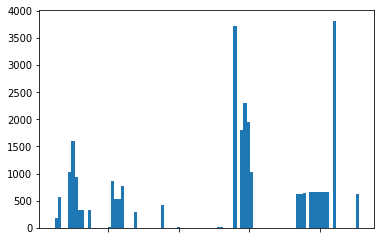

In [43]:
#print the histogram
plt.tick_params(
    axis='x',          
    labelbottom=False) 
plt.hist(dataset_for_histogram, bins=air_bnb_listings_raw.columns.size, rwidth=100)
plt.show()